In [31]:
import pandas as pd
import numpy as np
import matplotlib as nlp
tweets=pd.read_csv("../1k_sample_labelled_india.csv")

In [32]:
tweets

,index,Text,pos_tagged_words,new_languages,words_list,new_text,scores,compound,sentiment_vader
0,57000,kalau aku jadi anti vaccine ni salahkan keraja...,"[('if', 'IN'), ('i', 'JJ'), ('become', 'VBP'),...",ENGLISH,"['become', 'anti', 'vaccine', 'blame', 'malays...",become anti vaccine blame malaysian government...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.3182,negative
1,57003,"""no vax passports"": anti-vaccine protesters ga...","[('no', 'DT'), ('van', 'NN'), ('passports', 'V...",ENGLISH,"['van', 'passports', 'anti', 'vaccine', 'prote...",van passports anti vaccine protester gather sp...,"{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp...",-0.4767,negative
2,57010,"good, sir also make sure that other persons yo...","[('good', 'JJ'), ('sir', 'NN'), ('also', 'RB')...",ENGLISH,"['good', 'sir', 'also', 'make_sure', 'person',...",good sir also make_sure person fraternity part...,"{'neg': 0.084, 'neu': 0.727, 'pos': 0.189, 'co...",0.4404,positive
3,57014,some anti-vaxers my circle influence believe t...,"[('some', 'DT'), ('anti', 'JJ'), ('cars', 'NNS...",ENGLISH,"['anti', 'cars', 'circle', 'influence', 'belie...",anti cars circle influence believe second wave...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,57044,"myself, my lovely wife &amp; respectful parent...","[('myself', 'PRP'), ('my', 'PRP$'), ('lovely',...",ENGLISH,"['lovely', 'wife', 'amp', 'respectful', 'paren...",lovely wife amp respectful parent complete tak...,"{'neg': 0.075, 'neu': 0.424, 'pos': 0.501, 'co...",0.9801,positive
...,...,...,...,...,...,...,...,...,...
994,75434,amazing staff &amp; supporting .thanks all got...,"[('amazing', 'JJ'), ('staff', 'NN'), ('amp', '...",ENGLISH,"['amazing', 'staff', 'amp', 'support', 'thank'...",amazing staff amp support thank get vaccinate ...,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...",0.8625,positive
995,75444,it has been great honor &amp; pleasure have va...,"[('it', 'PRP'), ('has', 'VBZ'), ('been', 'VBN'...",ENGLISH,"['great', 'honor', 'amp', 'pleasure', 'vaccina...",great honor amp pleasure vaccinated people kin...,"{'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'comp...",0.9001,positive
996,75691,"great know, i am now fully #vaccinated with 2n...","[('great', 'JJ'), ('know', 'VBP'), ('i', 'JJ')...",ENGLISH,"['great', 'know', 'fully', 'vaccinate', 'dose'...",great know fully vaccinate dose also heartfelt...,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.8885,positive
997,75783,thank you #republic_of_india i have vaccinated...,"[('thank', 'IN'), ('you', 'PRP'), ('i', 'VBP')...",ENGLISH,"['thank', 'vaccinated', 'today', 'public', 'th...",thank vaccinated today public thank article th...,"{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...",0.8885,positive


In [33]:
tweets.drop(['index', 'Text', 'pos_tagged_words','new_languages','words_list', 'scores','compound'], axis=1, inplace=True)
tweets.head(10)

,new_text,sentiment_vader
0,become anti vaccine blame malaysian government...,negative
1,van passports anti vaccine protester gather sp...,negative
2,good sir also make_sure person fraternity part...,positive
3,anti cars circle influence believe second wave...,neutral
4,lovely wife amp respectful parent complete tak...,positive
5,finally india get second wave moron start spre...,negative
6,muslim stand palestine support equal right bel...,positive
7,politician run politic business engage anti na...,negative
8,good news bharat_biotech ney pura virus mar ka...,positive
9,job vaccines mantra push people poverty anti p...,negative


In [34]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   new_text         999 non-null    object
 1   sentiment_vader  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [35]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = tweets.sentiment_vader.apply(sentiment2target)

In [36]:
tweets['sentiment'] =targets

In [37]:
tweets.head(10)

,new_text,sentiment_vader,sentiment
0,become anti vaccine blame malaysian government...,negative,0
1,van passports anti vaccine protester gather sp...,negative,0
2,good sir also make_sure person fraternity part...,positive,2
3,anti cars circle influence believe second wave...,neutral,1
4,lovely wife amp respectful parent complete tak...,positive,2
5,finally india get second wave moron start spre...,negative,0
6,muslim stand palestine support equal right bel...,positive,2
7,politician run politic business engage anti na...,negative,0
8,good news bharat_biotech ney pura virus mar ka...,positive,2
9,job vaccines mantra push people poverty anti p...,negative,0


In [38]:
positives = tweets['sentiment'][tweets.sentiment == 2]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]
neutral = tweets['sentiment'][tweets.sentiment == 1]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))
print('No. of neutral tagged sentences is: {}'.format(len(neutral)))

Total length of the data is:         999
No. of positve tagged sentences is:  303
No. of negative tagged sentences is: 295
No. of neutral tagged sentences is: 401


In [39]:
grouped_df = tweets.groupby('sentiment')
# print(grouped_df.head())
for name, group in grouped_df:
    print("\Sentiment : ", name)
    cnt = 0
    for ind, row in group.iterrows():
        print(row["new_text"])
        cnt += 1
        if cnt == 5:
            break
    print("\n")

\Sentiment :  0
become anti vaccine blame malaysian government tire wait vaccine wait brother jamil campos keeper
van passports anti vaccine protester gather springsteen broadway reopen
finally india get second wave moron start spread anti vaccine venom india enter third_wave much hatred modi hope people get life
politician run politic business engage anti national activity vaccine supply waste provide false propaganda defame country constitution not provide freedom four activity hon_ble may take suitableaction
job vaccines mantra push people poverty anti people policy crumble health infrastructure lead million death lack talent callousness lead chaos wake late


\Sentiment :  1
anti cars circle influence believe second wave india cause vaccine overlap vaccination roll
far none circle acquaintance anti vaccine
please first check antibody test post vaccination mean est vaccine day vaccine day anti body test antibody make not vaccine per advice doctor
anyone need understand concept virus

### Tokenization

In [49]:
tokenized_tweet=tweets['new_text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [become, anti, vaccine, blame, malaysian, gove...
1    [van, passports, anti, vaccine, protester, gat...
2    [good, sir, also, make_sure, person, fraternit...
3    [anti, cars, circle, influence, believe, secon...
4    [lovely, wife, amp, respectful, parent, comple...
Name: new_text, dtype: object

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['new_text'].values.astype('U'))

In [65]:
X_copy = tweets['new_text']
y_copy=tweets['sentiment']
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.30,random_state=19)

### Naive Bayes

In [51]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=19)

In [52]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.665      0.765      0.8        0.66       0.71859296]
Train accuracy =93.71%
Test accuracy =77.00%


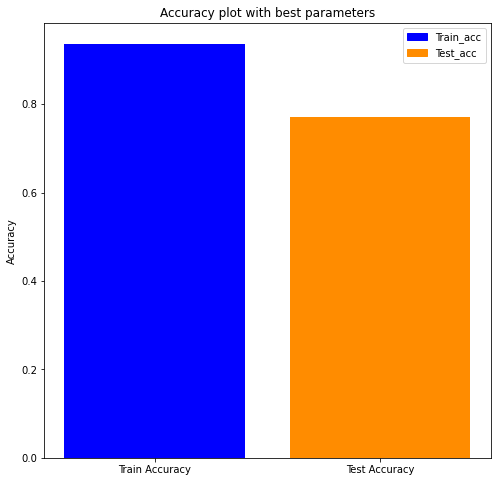

In [53]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

### Confusion Matrix

In [70]:
 from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_cnb)
print(confusion_matrix(y_test,y_pred_cnb))

[[64 13  8]
 [12 83 16]
 [10 10 84]]


In [55]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75        85
           1       0.78      0.75      0.76       111
           2       0.78      0.81      0.79       104

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [56]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =76.87%
Precision score =76.83%
Recall score =76.95%


Text(37.32000000000001, 0.5, 'True label')

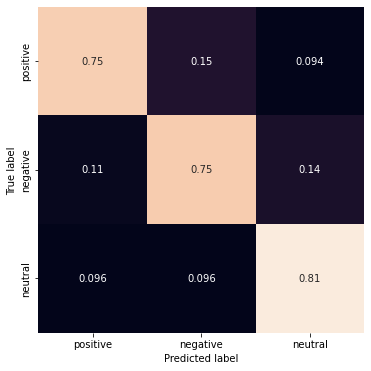

In [72]:
# Normalize the confusion matrix and plot it
import seaborn as sns
labels = ['positive', 'negative', 'neutral']
plt.figure(figsize=(6,6))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, square=True, annot=True, cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [68]:
# Show how the first 50 test tweets were classified and their true label
testing_predictions = []
for i in range(len(X_test.toarray())):
    if y_pred_cnb[i] == 0:
        testing_predictions.append('Negative') 
    else:
        if y_pred_cnb[i] == 1:
            testing_predictions.append('Neutral')
        else:
            testing_predictions.append('Positive')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'text':list(X_test_copy)})
check_df.replace(to_replace=0, value='Negative', inplace=True)
check_df.replace(to_replace=1, value='Neutral', inplace=True)
check_df.replace(to_replace=2, value='Positive', inplace=True)
check_df.iloc[:50]


,actual_label,prediction,text
0,Positive,Positive,thankyou superb work get jab save world vaccin...
1,Positive,Positive,amazing initiative sir word would definitely i...
2,Negative,Negative,salam get test anti spike title antibody day s...
3,Positive,Positive,another milestone india fifty eligible populat...
4,Negative,Positive,huge manipulation scam go couid nineteen vacci...
5,Negative,Negative,argument beyond comprehension get everyone vac...
6,Negative,Negative,take booster shot tell work two week fuck not ...
7,Positive,Positive,feel proud fully vaccinated take vaccine save ...
8,Negative,Negative,mad marry yes kid think school open u know mum...
9,Positive,Positive,vaccinate child age five year old help keep sc...
